In [31]:
import pandas as pd
import numpy as np


In [3]:
# Specifica il percorso del file
file_path = "C:\\Users\\giaco\\Desktop\\bet\\final_data\\POKERDATA_noearlyfolds.txt"

# Carica il dataset
df = pd.read_csv(file_path)

# Mostra le prime righe del DataFrame per verificare che il caricamento sia corretto
print(df.head())

   Reward  Equity BaselineEquity    HoleCards   Won  TotalAmount  \
0     9.0     0.0          0.268  ['mucked+']  15.0          6.0   
1     5.4     0.0          0.272  ['mucked+']  11.4          6.0   
2    -6.0     0.0          0.272   ['folded']   0.0          6.0   
3     5.4     0.0          0.528  ['mucked+']  11.4          6.0   
4    -6.0     0.0          0.528   ['folded']   0.0         -1.0   

   TotalAmount_player                PlayerID       Phase     Action  ...  \
0                 6.0  GgnYNkaZD+VDaqbTpYm2Jg  HOLE CARDS  raises to  ...   
1                 6.0  fbtdP0nXMsLYA+9qyOlFrA  HOLE CARDS      calls  ...   
2                 6.0  5SpBvCOUfhXdCI428CQBVA  HOLE CARDS     checks  ...   
3                 6.0  fbtdP0nXMsLYA+9qyOlFrA        FLOP       bets  ...   
4                 6.0  5SpBvCOUfhXdCI428CQBVA        FLOP      folds  ...   

   TURN_Actions RIVER_Actions HC_Aggression FLOP_Aggression  TURN_Aggression  \
0            []            []             0     

C:\Users\giaco\AppData\Local\Temp\ipykernel_39824\2211692727.py:5: DtypeWarning: Columns (2,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [4]:

# Assicurati che le colonne Amount e TotalAmount siano numeriche
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce')

# Sostituisci i NaN con 0
df['Amount'].fillna(0, inplace=True)
df['TotalAmount'].fillna(0, inplace=True)

# Dividi ciascun "Amount" per "TotalAmount" e crea una nuova colonna "AmountProportion"
df['AmountProportion'] = (df['Amount'] / df['TotalAmount']).replace([pd.np.inf, -pd.np.inf], 0).fillna(0)

# Arrotonda il risultato alla prima cifra decimale
df['AmountProportion'] = df['AmountProportion'].round(1)

# Mostra le prime righe del DataFrame per verificare il risultato
print(df[['Amount', 'TotalAmount', 'AmountProportion']].head())

   Amount  TotalAmount  AmountProportion
0    21.0          6.0               3.5
1     3.0          6.0               0.5
2     0.0          6.0               0.0
3     7.0          6.0               1.2
4     0.0         -1.0              -0.0


C:\Users\giaco\AppData\Local\Temp\ipykernel_39824\1800528616.py:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['AmountProportion'] = (df['Amount'] / df['TotalAmount']).replace([pd.np.inf, -pd.np.inf], 0).fillna(0)


Action counts:
 checks       35918
raises to    33324
calls        30643
bets         19259
folds        13820
Name: Action, dtype: int64


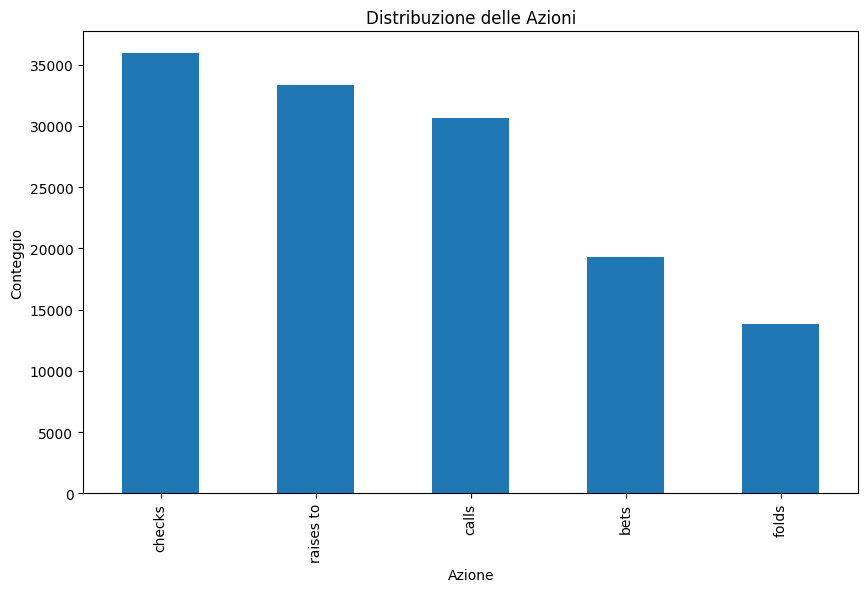

Statistiche descrittive per AmountProportion:
 count    132964.000000
mean          0.823591
std           1.807760
min         -42.700000
25%          -0.000000
50%           0.600000
75%           1.000000
max         119.300000
Name: AmountProportion, dtype: float64


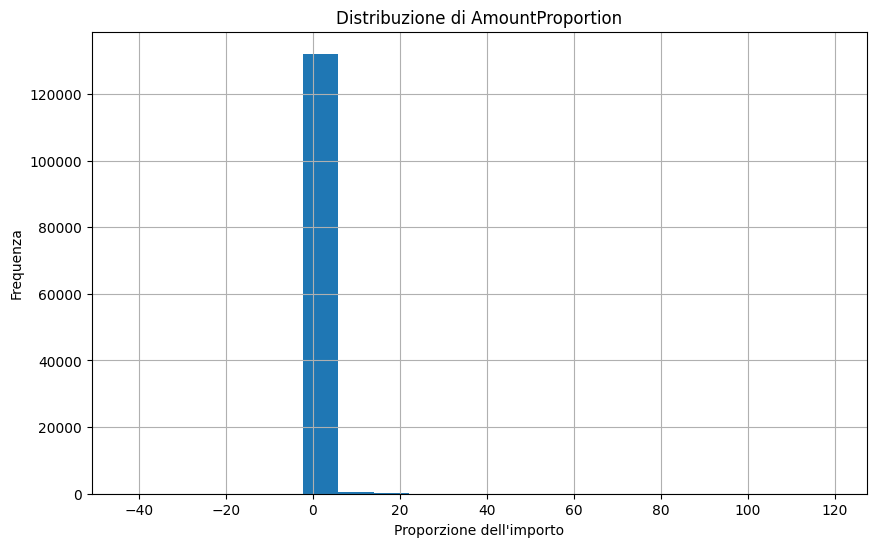

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Esplorazione della variabile 'Action'
action_counts = df['Action'].value_counts()
print("Action counts:\n", action_counts)

# Grafico a barre per la distribuzione delle azioni
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar')
plt.title('Distribuzione delle Azioni')
plt.xlabel('Azione')
plt.ylabel('Conteggio')
plt.show()

# Esplorazione della variabile 'AmountProportion'
amount_proportion_stats = df['AmountProportion'].describe()
print("Statistiche descrittive per AmountProportion:\n", amount_proportion_stats)

# Istogramma per la distribuzione di AmountProportion
plt.figure(figsize=(10, 6))
df['AmountProportion'].hist(bins=20)
plt.title('Distribuzione di AmountProportion')
plt.xlabel('Proporzione dell\'importo')
plt.ylabel('Frequenza')
plt.show()


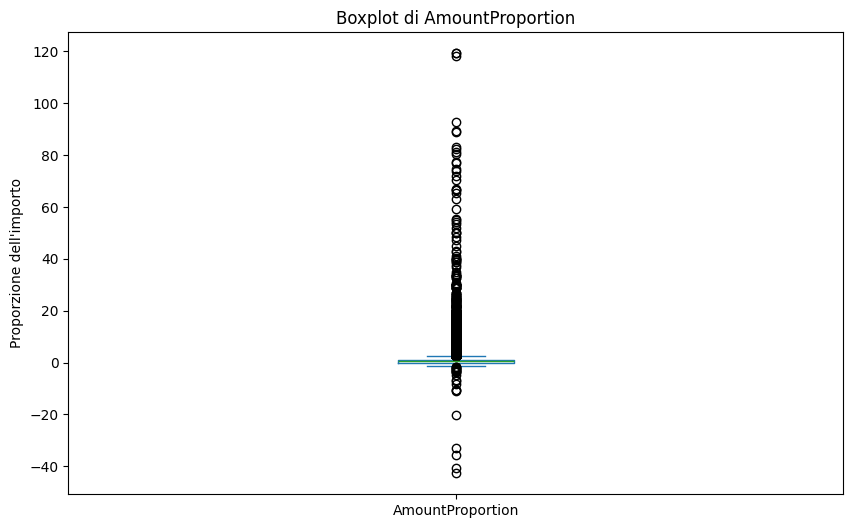

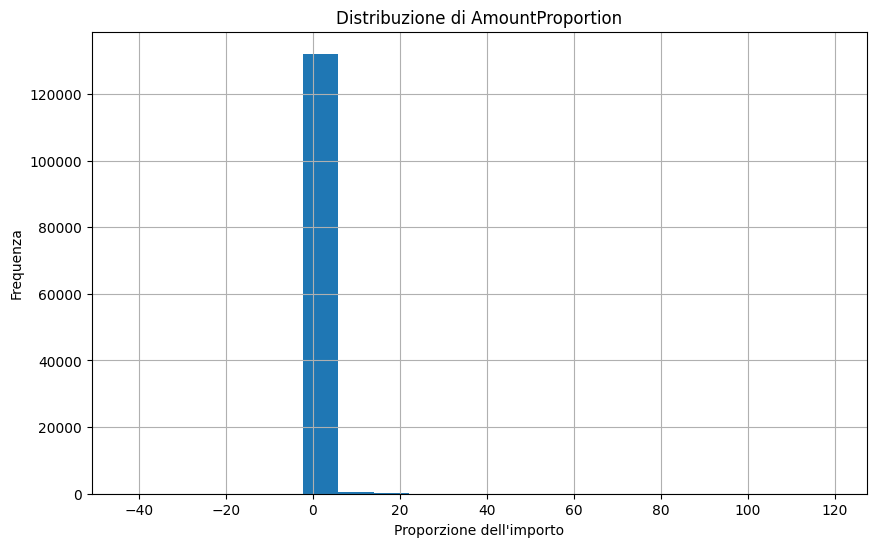

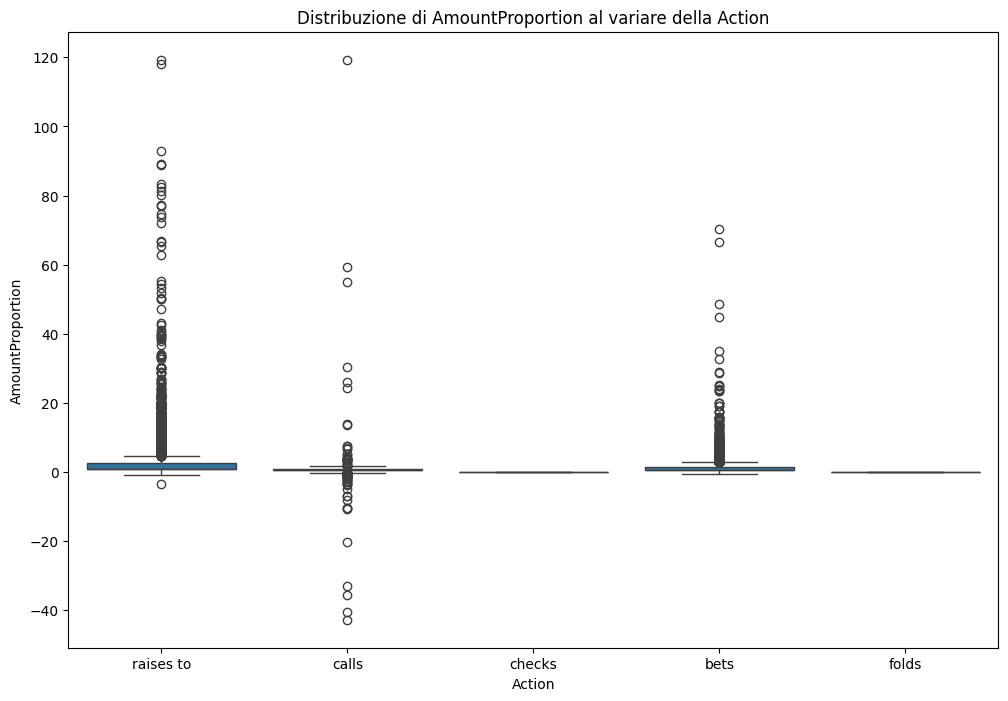

In [6]:
import seaborn as sns
# Trova l'outlier più alto
max_value = df['AmountProportion'].max()

# Trova il secondo valore più alto
second_max_value = df['AmountProportion'][df['AmountProportion'] != max_value].max()

# Sostituisci l'outlier più alto con il secondo valore più alto
df.loc[df['AmountProportion'] == max_value, 'AmountProportion'] = second_max_value
# Stampa un boxplot di AmountProportion
plt.figure(figsize=(10, 6))
df['AmountProportion'].plot(kind='box')
plt.title('Boxplot di AmountProportion')
plt.ylabel('Proporzione dell\'importo')
plt.show()


# Istogramma per la distribuzione di AmountProportion
plt.figure(figsize=(10, 6))
df['AmountProportion'].hist(bins=20)
plt.title('Distribuzione di AmountProportion')
plt.xlabel('Proporzione dell\'importo')
plt.ylabel('Frequenza')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Action', y='AmountProportion', data=df)
plt.title('Distribuzione di AmountProportion al variare della Action')
plt.xlabel('Action')
plt.ylabel('AmountProportion')
plt.show()

In [9]:
# Unifica bet e raise in push, e check e fold in stay
df['ActionUnified'] = df['Action'].replace({'bets': 'push', 'raises to': 'push', 'checks': 'stay', 'folds': 'stay', 'calls': 'call'})

# Definisci i bin per AmountProportion per "call" e "push"
call_bins = [-np.inf, 0.25, 0.5, 1, 2.5, 10, np.inf]
push_bins = [-np.inf, 0.5, 1, 2, 5, 20, np.inf]

call_labels = ['tinycall', 'smallcall', 'mediumcall', 'bigcall', 'hugecall', 'follow_whatever']
push_labels = ['tinypush', 'smallpush', 'mediumpush', 'bigpush', 'hugepush', 'all-in']

# Crea una nuova colonna per le nuove etichette di azioni
def categorize_action(row):
    if row['ActionUnified'] == 'call':
        category = pd.cut([row['AmountProportion']], bins=call_bins, labels=call_labels)[0]
        return f"{category}"
    elif row['ActionUnified'] == 'push':
        category = pd.cut([row['AmountProportion']], bins=push_bins, labels=push_labels)[0]
        return f"{category}"
    else:
        return row['ActionUnified']

df['NewAction'] = df.apply(categorize_action, axis=1)

# Codifica le nuove etichette di azioni come numerico
df['NewActionCode'] = df['NewAction'].astype('category').cat.codes

# Verifica i risultati
print(df[['Action', 'ActionUnified', 'AmountProportion', 'NewAction', 'NewActionCode']].head(10))

data = df.copy()

      Action ActionUnified  AmountProportion   NewAction  NewActionCode
0  raises to          push               3.5     bigpush              2
1      calls          call               0.5   smallcall              8
2     checks          stay               0.0        stay             10
3       bets          push               1.2  mediumpush              7
4      folds          stay              -0.0        stay             10
5  raises to          push               3.5     bigpush              2
6  raises to          push               1.0   smallpush              9
7  raises to          push               0.9   smallpush              9
8      calls          call               0.7  mediumcall              6
9       bets          push               1.3  mediumpush              7


In [10]:
import pandas as pd
import numpy as np
from keras.models import Model, load_model
from keras.layers import Input, Embedding, Dense, Flatten, Lambda, Layer
from keras.optimizers import Adam
import keras.backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

# Funzione per la distanza euclidea
class EuclideanDistance(Layer):
    def __init__(self, **kwargs):
        super(EuclideanDistance, self).__init__(**kwargs)

    def call(self, inputs):
        x, y = inputs
        sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
        return K.sqrt(K.maximum(sum_square, K.epsilon()))

# Funzione di perdita contrastiva
def contrastive_loss(y_true, y_pred):
    margin = 1.0
    y_true = tf.cast(y_true, y_pred.dtype)  # Assicura che y_true sia dello stesso tipo di y_pred
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

In [11]:
giocate = ['stay', 'tinycall', 'smallcall', 'mediumcall', 'bigcall', 'hugecall', 'follow_whatever',
           'tinypush', 'smallpush', 'mediumpush', 'bigpush', 'hugepush', 'all-in']

# Codifica delle giocate come numerico
df = pd.DataFrame({'NewAction': giocate})
df['NewActionCode'] = df['NewAction'].astype('category').cat.codes

# Coppie Positive (giocate simili)
positive_pairs = [
    ('tinycall', 'smallcall'), ('smallcall', 'mediumcall'), ('mediumcall', 'bigcall'), ('bigcall', 'hugecall'), ('hugecall', 'follow_whatever'),
    ('tinypush', 'smallpush'), ('smallpush', 'mediumpush'), ('mediumpush', 'bigpush'), ('bigpush', 'hugepush'), ('hugepush', 'all-in'),
    ('tinypush', 'smallcall'), ('smallpush', 'mediumcall'), ('mediumpush', 'bigcall'), ('bigpush', 'hugecall'), ('hugepush', 'follow_whatever'),
    ('stay', 'tinycall'), ('stay', 'tinypush'), ('tinycall', 'tinypush'), ('smallcall', 'smallpush'), ('mediumcall', 'mediumpush'), ('bigcall', 'bigpush'), ('hugecall', 'hugepush'), ('follow_whatever', 'all-in'),
    ('follow_whatever', 'bigpush'), ('follow_whatever', 'bigpush'),
]

# Coppie Negative (giocate dissimili)
negative_pairs = [
    ('all-in', 'stay'), ('all-in', 'tinypush'), ('all-in', 'smallpush'), ('all-in', 'mediumpush'), ('all-in', 'bigpush'),
    ('all-in', 'tinycall'), ('all-in', 'smallcall'), ('all-in', 'mediumcall'), ('all-in', 'bigcall'), ('all-in', 'hugecall'),
    ('hugepush', 'stay'), ('hugepush', 'tinypush'), ('hugepush', 'smallpush'), ('hugepush', 'mediumpush'),
    ('hugepush', 'tinycall'), ('hugepush', 'smallcall'), ('hugepush', 'mediumcall'), ('hugepush', 'bigcall'),
    ('bigpush', 'stay'), ('bigpush', 'tinypush'), ('bigpush', 'smallpush'),
    ('bigpush', 'tinycall'), ('bigpush', 'smallcall'), ('bigpush', 'mediumcall'),
    ('mediumpush', 'stay'), ('mediumpush', 'tinypush'),
    ('mediumpush', 'tinycall'), ('mediumpush', 'smallcall'),
    ('smallpush', 'stay'),
    ('smallpush', 'tinycall'),

    ('follow_whatever', 'stay'), ('follow_whatever', 'tinypush'), ('follow_whatever', 'smallpush'), ('follow_whatever', 'mediumpush'), ('follow_whatever', 'bigpush'),
    ('follow_whatever', 'tinycall'), ('follow_whatever', 'smallcall'), ('follow_whatever', 'mediumcall'), ('follow_whatever', 'bigcall'),
    ('hugecall', 'stay'), ('hugecall', 'tinypush'), ('hugecall', 'smallpush'), ('hugecall', 'mediumpush'),
    ('hugecall', 'tinycall'), ('hugecall', 'smallcall'), ('hugecall', 'mediumcall'),
    ('bigcall', 'stay'), ('bigcall', 'tinypush'), ('bigcall', 'smallpush'),
    ('bigcall', 'tinycall'), ('bigcall', 'smallcall'),
    ('mediumcall', 'stay'), ('mediumcall', 'tinypush'),
    ('mediumcall', 'tinycall'),
    ('smallcall', 'stay'),
]

# Codifica delle coppie come numerico
positive_pairs = [(df[df['NewAction'] == a]['NewActionCode'].values[0], df[df['NewAction'] == b]['NewActionCode'].values[0]) for a, b in positive_pairs]
negative_pairs = [(df[df['NewAction'] == a]['NewActionCode'].values[0], df[df['NewAction'] == b]['NewActionCode'].values[0]) for a, b in negative_pairs]

# Creazione delle etichette (1 per coppie positive, 0 per coppie negative)
pairs = positive_pairs + negative_pairs
labels = np.array([1] * len(positive_pairs) + [0] * len(negative_pairs))

# Separazione delle coppie in input left e right
pairs = np.array(pairs)
left_input = pairs[:, 0].reshape(-1, 1)
right_input = pairs[:, 1].reshape(-1, 1)

# Divisione dei dati in train e validation set
left_train, left_val, right_train, right_val, y_train, y_val = train_test_split(left_input, right_input, labels, test_size=0.3, random_state=42)

print("Coppie e etichette pronte per l'addestramento:")
print("Coppie positive:", positive_pairs)
print("Coppie negative:", negative_pairs)

Coppie e etichette pronte per l'addestramento:
Coppie positive: [(11, 8), (8, 6), (6, 1), (1, 4), (4, 3), (12, 9), (9, 7), (7, 2), (2, 5), (5, 0), (12, 8), (9, 6), (7, 1), (2, 4), (5, 3), (10, 11), (10, 12), (11, 12), (8, 9), (6, 7), (1, 2), (4, 5), (3, 0), (3, 2), (3, 2)]
Coppie negative: [(0, 10), (0, 12), (0, 9), (0, 7), (0, 2), (0, 11), (0, 8), (0, 6), (0, 1), (0, 4), (5, 10), (5, 12), (5, 9), (5, 7), (5, 11), (5, 8), (5, 6), (5, 1), (2, 10), (2, 12), (2, 9), (2, 11), (2, 8), (2, 6), (7, 10), (7, 12), (7, 11), (7, 8), (9, 10), (9, 11), (3, 10), (3, 12), (3, 9), (3, 7), (3, 2), (3, 11), (3, 8), (3, 6), (3, 1), (4, 10), (4, 12), (4, 9), (4, 7), (4, 11), (4, 8), (4, 6), (1, 10), (1, 12), (1, 9), (1, 11), (1, 8), (6, 10), (6, 12), (6, 11), (8, 10)]


Epoch 1/125
2/2 [==============================] - 1s 205ms/step - loss: 0.5017 - val_loss: 0.4723
Epoch 2/125
2/2 [==============================] - 0s 45ms/step - loss: 0.4966 - val_loss: 0.4684
Epoch 3/125
2/2 [==============================] - 0s 43ms/step - loss: 0.4918 - val_loss: 0.4645
Epoch 4/125
2/2 [==============================] - 0s 46ms/step - loss: 0.4869 - val_loss: 0.4606
Epoch 5/125
2/2 [==============================] - 0s 49ms/step - loss: 0.4823 - val_loss: 0.4568
Epoch 6/125
2/2 [==============================] - 0s 44ms/step - loss: 0.4775 - val_loss: 0.4530
Epoch 7/125
2/2 [==============================] - 0s 75ms/step - loss: 0.4729 - val_loss: 0.4492
Epoch 8/125
2/2 [==============================] - 0s 48ms/step - loss: 0.4681 - val_loss: 0.4456
Epoch 9/125
2/2 [==============================] - 0s 52ms/step - loss: 0.4634 - val_loss: 0.4419
Epoch 10/125
2/2 [==============================] - 0s 48ms/step - loss: 0.4588 - val_loss: 0.4383
Epoch 11/125
2/2 [

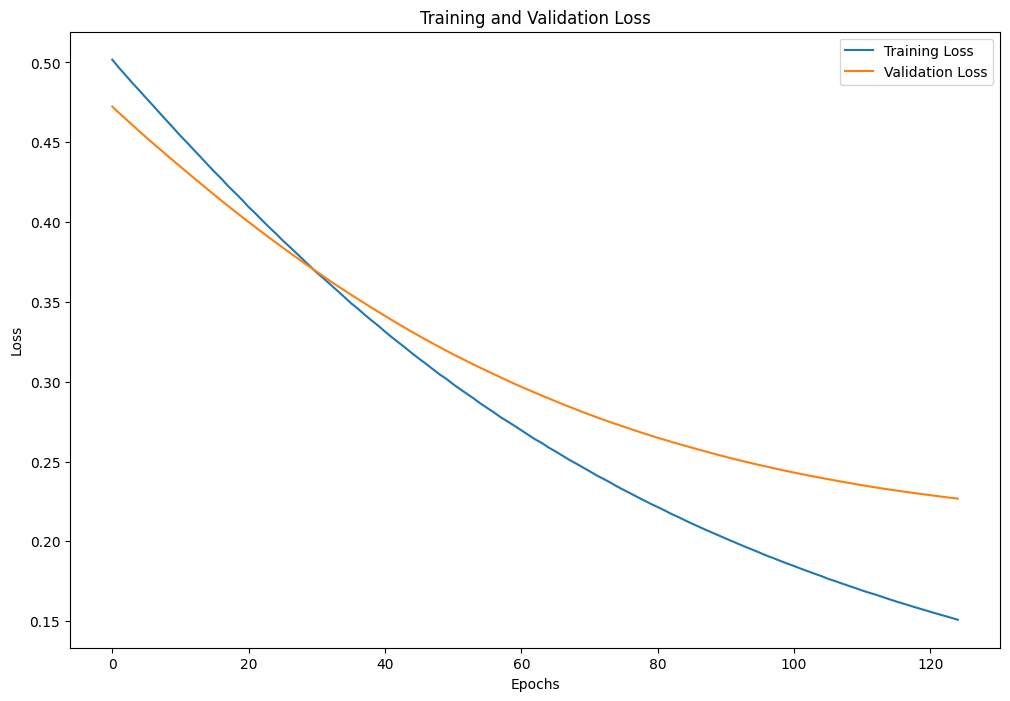

In [12]:
from keras.layers import Dropout, BatchNormalization

# Definizione del modello di embedding con regularization
action_input = Input(shape=(1,), name='action_input')
action_embedding = Embedding(input_dim=len(df['NewAction'].unique()), output_dim=16, name='action_embedding')(action_input)
action_flattened = Flatten(name='action_flatten')(action_embedding)
embedding_model = Model(inputs=action_input, outputs=action_flattened, name='embedding_model')

# Input per le coppie di azioni
input_a = Input(shape=(1,), name='input_a')
input_b = Input(shape=(1,), name='input_b')

# Ottieni gli embedding per le coppie di azioni
embedding_a = embedding_model(input_a)
embedding_b = embedding_model(input_b)

# Calcola la distanza euclidea tra gli embedding
distance = EuclideanDistance()([embedding_a, embedding_b])

# Definizione del modello siamese
siamese_model = Model(inputs=[input_a, input_b], outputs=distance)
siamese_model.compile(optimizer=Adam(learning_rate=0.0005), loss=contrastive_loss)

# Addestra il modello
history = siamese_model.fit([left_train, right_train], y_train, epochs=125, batch_size=32, validation_data=([left_val, right_val], y_val))

# Salva il modello addestrato
siamese_model.save('siamese_model.h5')

import matplotlib.pyplot as plt

# Visualizza le metriche dell'addestramento e della validazione
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 66ms/step
Dizionario degli embedding: {'stay': array([-0.13538635, -0.14131175, -0.0934421 , -0.11177836, -0.09207962,
       -0.1448615 ,  0.08666218,  0.12802921,  0.12178108, -0.1500398 ,
        0.07677823, -0.09796434,  0.13277747,  0.14203238, -0.09060323,
        0.01891761], dtype=float32), 'tinycall': array([-0.12333476,  0.11380555,  0.01227336,  0.02022994,  0.10216936,
        0.09235984, -0.06179968,  0.13016449,  0.09108526,  0.12482854,
        0.10252973,  0.10991162,  0.081329  , -0.00985898,  0.10973107,
       -0.08980375], dtype=float32), 'smallcall': array([-0.07940868,  0.09273785, -0.07827529, -0.114876  ,  0.10002967,
       -0.07764183,  0.06551974,  0.09876443, -0.03308327,  0.01134469,
        0.0876165 ,  0.00291485, -0.07287863,  0.03783824,  0.10882062,
       -0.09481929], dtype=float32), 'mediumcall': array([ 0.08864675,  0.11181039, -0.09597203, -0.11758279, -0.04617224,
       -0.14409035,  0.0367505 ,  0.09914

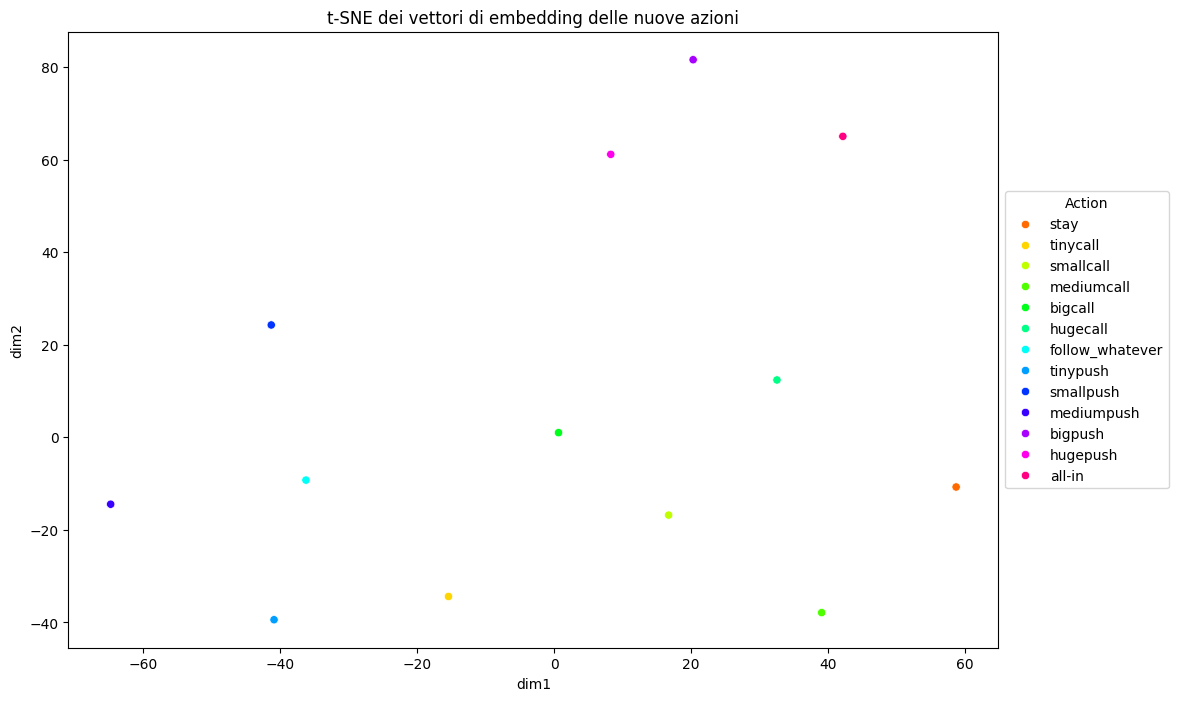

In [17]:
# Definisci un dizionario con la funzione personalizzata
custom_objects = {'EuclideanDistance': EuclideanDistance, 'contrastive_loss': contrastive_loss}

# Carica il modello addestrato
siamese_model = load_model('siamese_model.h5', custom_objects=custom_objects)

# Ottieni il modello di embedding
embedding_layer = siamese_model.get_layer('embedding_model')
embedding_output = embedding_layer.get_layer('action_flatten').output
embedding_model = Model(inputs=embedding_layer.input, outputs=embedding_output)

# Ottieni gli embedding per le azioni
action_input_data = np.arange(len(df['NewAction'])).reshape(-1, 1)
action_embeddings = embedding_model.predict(action_input_data)
action_dict = {df['NewAction'].iloc[i]: action_embeddings[i] for i in range(len(df['NewAction']))}
print("Dizionario degli embedding:", action_dict)  # Stampa per verificare
    
# Visualizza gli embedding usando t-SNE
tsne = TSNE(n_components=2, perplexity=7, random_state=42)
tsne_results = tsne.fit_transform(action_embeddings)

# Crea un DataFrame per i risultati t-SNE
df_tsne = pd.DataFrame(tsne_results, columns=['dim1', 'dim2'])
df_tsne['Action'] = df['NewAction']

# Palette con 14 colori distinti
palette = sns.color_palette("hsv", len(df_tsne['Action'].unique()))

# Visualizza i risultati t-SNE
plt.figure(figsize=(12, 8))
sns.scatterplot(x='dim1', y='dim2', hue='Action', data=df_tsne, palette=palette)
plt.title('t-SNE dei vettori di embedding delle nuove azioni')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Action')
plt.show()

In [14]:
print(df_tsne)

          dim1        dim2           Action
0   -83.299110   61.950619             stay
1    47.951626   26.834715         tinycall
2   -29.413258   49.622753        smallcall
3   -41.166988   83.786476       mediumcall
4   -12.213037   33.454571          bigcall
5   -60.085918   32.488831         hugecall
6    63.122696  -12.477495  follow_whatever
7    70.887794   19.957029         tinypush
8    54.952965  -48.317902        smallpush
9   100.110168   -6.768951       mediumpush
10 -120.262352 -116.156258          bigpush
11 -137.420975 -100.835861         hugepush
12 -132.530930 -142.312592           all-in


In [46]:
hole_cards_levels = data['CommunityCards'].unique()
print("Livelli del fattore 'HoleCards':")
for level in hole_cards_levels:
    print(level)

Livelli del fattore 'HoleCards':
[]
['2h', '8h', 'Kc']
['Qd', 'Kd', '4d']
['3h', 'Ac', 'Js']
['7d', '9h', '4s']
['7d', '9h', '4s', 'Qs']
['Ad', '8s', '9d']
['Ac', '3h', 'Qd']
['7h', '3h', '2d']
['2c', 'Ah', 'Ks']
['5s', 'Qd', 'Ah']
['5s', 'Qd', 'Ah', '8s']
['7s', '8h', '2s']
['Kh', 'Ts', '2c']
['2s', '2c', '6d']
['2s', '2c', '6d', '7s']
['5s', 'Qs', '9c']
['5s', 'Qs', '9c', '4d']
['5s', 'Qs', '9c', '4d', '6d']
['9s', 'Kh', '7d']
['9s', 'Kh', '7d', 'Tc']
['9s', 'Kh', '7d', 'Tc', '4c']
['8s', '7s', '9c']
['8s', '7s', '9c', 'Ac']
['8s', '7s', '9c', 'Ac', 'Kd']
['5c', '4s', 'Qs']
['5c', '4s', 'Qs', 'Qc']
['9c', '3d', 'Qd']
['9c', '3d', 'Qd', '5s']
['9c', '3d', 'Qd', '5s', '4d']
['9s', '6d', '7d']
['9s', '6d', '7d', '3c']
['4h', '9c', '6c']
['Kh', '8s', '8h']
['Ks', '3d', '2s']
['7h', 'Qh', '3d']
['7h', 'Qh', '3d', 'Kd']
['6h', 'As', 'Qd']
['6h', 'As', 'Qd', '9h']
['6h', 'As', 'Qd', '9h', 'Ad']
['5c', '3c', '8d']
['Qd', '6d', '5d']
['Qd', '6d', '5d', '7h']
['Jc', '6d', '7c']
['Jc', '6d', '7

In [54]:
data['HandStrength'] = data.apply(
    lambda row: row['Equity'] - row['BaselineEquity'] if row['Equity'] > 0 else 0,
    axis=1
)

context_variables = ["Reward", "NewAction", "HandStrength",
                     "Phase", "RelativePosition", "ActivePlayers", "Players", "Blind", 
                     "TotalAmount", "TotalAmount_player", "PlayerStack"]

# Creare una lista di partite, ciascuna partita è una lista di giocate con le variabili di contesto selezionate
partite = []
for game_id, game_df in data.groupby('GameID'):
    selected_vars = game_df[context_variables].copy()
    partite.append(selected_vars)

# Mostrare un esempio di partita
for giocata in partite[1].itertuples():
    print(giocata)

Pandas(Index=1, Reward=5.4, NewAction='smallcall', HandStrength=0.0, Phase='HOLE CARDS', RelativePosition=1, ActivePlayers=5, Players=6, Blind='small', TotalAmount=6.0, TotalAmount_player=6.0, PlayerStack=1460.1)
Pandas(Index=2, Reward=-6.0, NewAction='stay', HandStrength=0.0, Phase='HOLE CARDS', RelativePosition=2, ActivePlayers=5, Players=6, Blind='big', TotalAmount=6.0, TotalAmount_player=6.0, PlayerStack=600.0)
Pandas(Index=3, Reward=5.4, NewAction='mediumpush', HandStrength=0.0, Phase='FLOP', RelativePosition=1, ActivePlayers=2, Players=6, Blind='small', TotalAmount=6.0, TotalAmount_player=6.0, PlayerStack=1460.1)
Pandas(Index=4, Reward=-6.0, NewAction='stay', HandStrength=0.0, Phase='FLOP', RelativePosition=2, ActivePlayers=2, Players=6, Blind='big', TotalAmount=-1.0, TotalAmount_player=6.0, PlayerStack=600.0)


In [43]:
print(partite[1])

   Reward   NewAction    HoleCards      CommunityCards  BaselineEquity  \
1     5.4   smallcall  ['mucked+']                  []           0.272   
2    -6.0        stay   ['folded']                  []           0.272   
3     5.4  mediumpush  ['mucked+']  ['2h', '8h', 'Kc']           0.528   
4    -6.0        stay   ['folded']  ['2h', '8h', 'Kc']           0.528   

   Equity       Phase RelativePosition  ActivePlayers  Blind  TotalAmount  \
1     0.0  HOLE CARDS                1              5  small          6.0   
2     0.0  HOLE CARDS                2              5    big          6.0   
3     0.0        FLOP                1              2  small          6.0   
4     0.0        FLOP                2              2    big         -1.0   

   TotalAmount_player  PlayerStack  
1                 6.0       1460.1  
2                 6.0        600.0  
3                 6.0       1460.1  
4                 6.0        600.0  


In [86]:
from sklearn.preprocessing import StandardScaler

def extract_rewards_and_remove(data):
    rewards = data['Reward'].tolist()
    data = data.drop(columns=['Reward'])
    return rewards, data
# Funzione per estrarre gli embedding e rimuovere NewAction dal dataset
def extract_embeddings_and_remove(data, action_dict):
    embeddings = []
    for new_action in data['NewAction']:
        if new_action in action_dict:
            embeddings.append(action_dict[new_action])
    data = data.drop(columns=['NewAction'])
    return embeddings, data

def calcola_proporzioni_e_rimuovi_variabili(data, desired_length):
    # Calcola le proporzioni
    data['TotalAmount_proportion'] = data['TotalAmount'] / data['PlayerStack']
    data['TotalAmount_player_proportion'] = data['TotalAmount_player'] / data['PlayerStack']
    data['PlayerStack_proportion'] = data['PlayerStack'] / data['PlayerStack'].max()

    # Creare un vettore combinato
    data['monetary_context'] = data.apply(lambda row: pad_or_trim_vector(
        np.array([row['TotalAmount_proportion'], row['TotalAmount_player_proportion'], row['PlayerStack_proportion']]),
        desired_length), axis=1)

    # Rimuovi le variabili originali che sono state trasformate
    data = data.drop(columns=['TotalAmount', 'TotalAmount_player', 'PlayerStack', 
                              'TotalAmount_proportion', 'TotalAmount_player_proportion', 
                              'PlayerStack_proportion'])

    return data

def pad_or_trim_vector(vector, length):
    if len(vector) > length:
        return vector[:length]
    else:
        return np.pad(vector, (0, length - len(vector)), 'constant')

def preprocess_position_variables(data):
    phase_mapping = {'HOLE CARDS': 0, 'FLOP': 1, 'TURN': 2, 'RIVER': 3}
    data['Phase_encoded'] = data['Phase'].map(phase_mapping)
    data['Phase_sin'] = np.sin(data['Phase_encoded'] * (2. * np.pi / 4))
    data['Phase_cos'] = np.cos(data['Phase_encoded'] * (2. * np.pi / 4))
    data['RelativePosition_normalized'] = data['RelativePosition'] / data['Players']
    data['ActivePlayers_proportion'] = data['ActivePlayers'] / data['Players']
    data = pd.get_dummies(data, columns=['Blind'], prefix='Blind')
    for var in ['Blind_no', 'Blind_small', 'Blind_big']:
        if var not in data.columns:
            data[var] = 0
    return data
    
def combine_position_variables(data):
    position_vars = ['RelativePosition_normalized', 'ActivePlayers_proportion', 'Players', 'Blind_no', 'Blind_small', 'Blind_big']
    data['vector_A'] = data.apply(lambda row: np.array([row[var] for var in position_vars]), axis=1)
    data['vector_B'] = data.apply(lambda row: np.array([row['Phase_sin'], row['Phase_cos']] * (len(row['vector_A']) // 2)), axis=1)
    data['position_context'] = data.apply(lambda row: row['vector_A'] + row['vector_B'], axis=1)
    return data

def normalize_concatenate_context(data, desired_length):
    data['HandStrength_context'] = data.apply(lambda row: pad_or_trim_vector(np.array([row['HandStrength']]), desired_length), axis=1)
    position_context_matrix = np.vstack(data['position_context'].values)
    monetary_context_matrix = np.vstack(data['monetary_context'].values)
    HandStrength_context_matrix = np.vstack(data['HandStrength_context'].values)


    scaler = StandardScaler()
    normalized_position = scaler.fit_transform(position_context_matrix)
    normalized_monetary = scaler.fit_transform(monetary_context_matrix)
    normalized_HandStrength = scaler.fit_transform(HandStrength_context_matrix)

    data['position_context'] = [normalized_position[i] for i in range(normalized_position.shape[0])]
    data['monetary_context'] = [normalized_monetary[i] for i in range(normalized_monetary.shape[0])]
    data['HandStrength_context'] = [normalized_HandStrength[i] for i in range(normalized_HandStrength.shape[0])]
    data['context'] = data.apply(lambda row: np.concatenate([row['HandStrength_context'], row['monetary_context'], row['position_context']]), axis=1)

    return data

def remove_original_variables(data):
    data.drop(columns=['Phase', 'Phase_encoded', 'Phase_sin', 'Phase_cos', 
                       'RelativePosition', 'RelativePosition_normalized', 
                       'ActivePlayers', 'ActivePlayers_proportion', 
                       'Players', 'Blind_no', 'Blind_small', 'Blind_big', 
                       'vector_A', 'vector_B', 'HandStrength'], inplace=True)
    return data

def preprocess_and_extract_rewards_embeddings(partite, action_dict, desired_length):
    rewards = []
    embeddings = []
    partite_senza_reward_e_action = []

    for partita in partite:
        # Estrai le reward e rimuovi la colonna
        game_rewards, partita_senza_reward = extract_rewards_and_remove(partita)
        rewards.append(game_rewards)
        
        # Estrai gli embedding e rimuovi la colonna
        game_embeddings, partita_senza_reward_e_action = extract_embeddings_and_remove(partita_senza_reward, action_dict)
        embeddings.append(game_embeddings)
        
        # Calcola le proporzioni e crea il vettore monetario
        partita_senza_reward_e_action = calcola_proporzioni_e_rimuovi_variabili(partita_senza_reward_e_action, desired_length)

        # Preprocessa le variabili di posizione e crea il vettore di contesto posizionale
        partita_senza_reward_e_action = preprocess_position_variables(partita_senza_reward_e_action)
        partita_senza_reward_e_action = combine_position_variables(partita_senza_reward_e_action)

        # Normalizza il vettore di contesto posizionale
        partita_senza_reward_e_action = normalize_concatenate_context(partita_senza_reward_e_action, desired_length)
        partita_senza_reward_e_action = remove_original_variables(partita_senza_reward_e_action)

        partite_senza_reward_e_action.append(partita_senza_reward_e_action)

    return rewards, embeddings, partite_senza_reward_e_action

In [89]:
rewards, embeddings, partite_senza_reward_e_action = preprocess_and_extract_rewards_embeddings(partite[:20], action_dict, desired_length=10)

In [103]:
# Esempio di stampa dei risultati
i = 3
print("Rewards:", rewards[i])
print("Embeddings:", embeddings[i])
print(partite_senza_reward_e_action[i])

contesto_partite = partite_senza_reward_e_action["context"]

print(contesto_partite[i])


Rewards: [9.0]
Embeddings: [array([-0.03918935, -0.12837857,  0.10871382,  0.12020926,  0.12216835,
       -0.11110199, -0.12691286, -0.10756431, -0.11467466, -0.10871287,
       -0.13476962,  0.06475407,  0.0922867 ,  0.06379514,  0.11918355,
        0.10183132], dtype=float32)]
                                     monetary_context  \
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                  position_context  \
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                 HandStrength_context  \
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                              context  
11  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


TypeError: list indices must be integers or slices, not str

In [104]:
def preprocess_giocata(giocata, variabili_incluse):
    # Estrarre le variabili specificate dalla giocata
    preprocessed = []
    for var in variabili_incluse:
        value = getattr(giocata, var, None)
        if value is not None:
            preprocessed.append(f"{var}:{value}")
    return " ".join(preprocessed)

def create_sequences(partite, rewards, embeddings):
    targets = []
    actions = []
    contexts = []
    for i in range(len(partite)):
        targets.append(rewards[i])
        actions.append(embeddings[i])
        contexts.append(partite[i]['context'].tolist())
    return targets, actions, contexts


In [109]:
# Creare le sequenze con embedding contestuale
targets, actions, contexts = create_sequences(partite_senza_reward_e_action[:20], rewards[:20], embeddings[:20])

# Mostrare un esempio di sequenza
print(targets[1])
print(actions[1])
print(contexts[1])

[5.4, -6.0, 5.4, -6.0]
[array([-0.07940868,  0.09273785, -0.07827529, -0.114876  ,  0.10002967,
       -0.07764183,  0.06551974,  0.09876443, -0.03308327,  0.01134469,
        0.0876165 ,  0.00291485, -0.07287863,  0.03783824,  0.10882062,
       -0.09481929], dtype=float32), array([-0.13538635, -0.14131175, -0.0934421 , -0.11177836, -0.09207962,
       -0.1448615 ,  0.08666218,  0.12802921,  0.12178108, -0.1500398 ,
        0.07677823, -0.09796434,  0.13277747,  0.14203238, -0.09060323,
        0.01891761], dtype=float32), array([ 0.03316515,  0.09380665,  0.12448402,  0.09747686, -0.11755229,
        0.0645285 , -0.11436188, -0.05659915,  0.11505044,  0.00993535,
        0.1079182 , -0.10328151,  0.09914014, -0.11314327, -0.05624447,
       -0.11721472], dtype=float32), array([-0.13538635, -0.14131175, -0.0934421 , -0.11177836, -0.09207962,
       -0.1448615 ,  0.08666218,  0.12802921,  0.12178108, -0.1500398 ,
        0.07677823, -0.09796434,  0.13277747,  0.14203238, -0.09060323,
 

EMBEDDINGS:

WALKTROUGH:

Per utilizzare il contesto per generare la giocata che massimizza la reward, il processo può essere suddiviso in diverse fasi teoriche. Ecco i passi chiave per procedere con l'embedding e l'addestramento del modello:

### 1. *Preparazione del Dataset*
- *Contesto*: Includi tutte le variabili di contesto rilevanti (es. equity, posizione relativa, stack dei giocatori, carte comuni, ecc.).
- *Azioni*: Le giocate effettive fatte dai giocatori (es. fold, call, raise, bet con importo specifico).
- *Reward*: La reward calcolata per ogni azione.

### 2. *Embedding*
- *Embedding del Contesto*: Trasforma le variabili di contesto in un vettore di embedding. Questo può includere:
  - *Embedding delle carte*: Usa tecniche di embedding per rappresentare le carte in mano e le carte comuni.
  - *Embedding delle posizioni*: Rappresenta la posizione relativa dei giocatori rispetto al dealer.
  - *Embedding degli stack*: Usa l'embedding per rappresentare lo stack dei giocatori.
  - *Embedding delle azioni precedenti*: Rappresenta le azioni precedenti dei giocatori nella mano corrente.
- *Embedding delle Azioni*: Trasforma le azioni dei giocatori in un vettore di embedding.

### 3. *Modello*
- *Input del Modello*: Il modello prende come input l'embedding del contesto.
- *Output del Modello*: Il modello genera l'azione successiva che massimizza la reward.
  - Usa un approccio supervisato per addestrare il modello a prevedere le azioni che portano alle reward massime basate sul contesto.
  - Usa tecniche di reinforcement learning per migliorare ulteriormente le decisioni basate sulla reward effettiva ottenuta.

### 4. *Architettura del Modello*
- *Encoder del Contesto*: Una rete neurale (es. Transformer o LSTM) per processare l'embedding del contesto e produrre una rappresentazione interna.
- *Decoder delle Azioni*: Una rete neurale per generare l'azione successiva basata sulla rappresentazione interna del contesto.
- *Reward Signal*: Usa la reward come segnale di retroazione per aggiornare i pesi del modello durante l'addestramento.

### 5. *Addestramento*
- *Loss Function*: Definisci una funzione di perdita che tenga conto della reward. Ad esempio, puoi utilizzare una loss basata su mean squared error (MSE) tra la reward prevista e quella effettiva.
- *Ottimizzazione*: Usa tecniche di ottimizzazione (es. gradient descent) per minimizzare la funzione di perdita e migliorare le performance del modello.

### 6. *Valutazione e Tuning*
- *Valutazione del Modello*: Usa metriche come l'accuracy delle azioni previste, il valore atteso delle reward e altre metriche specifiche del poker per valutare le performance del modello.
- *Tuning del Modello*: Regola iperparametri e architettura del modello per migliorare le performance.

### 7. *Deployment*
- *Deploy del Modello*: Integra il modello addestrato in un sistema di gioco per testare e validare le sue decisioni in situazioni reali o simulate.

### Conclusione
In sintesi, l'approccio consiste nel creare embedding per le variabili di contesto e le azioni, usare questi embedding come input per un modello neurale che genera azioni basate sul contesto, e addestrare il modello a massimizzare le reward usando tecniche di machine learning e reinforcement learning. Questo processo teorico ti guiderà nel trasformare i tuoi dati in un sistema capace di prendere decisioni informate che massimizzano la reward nel contesto del poker.

In [112]:
import tensorflow as tf
from keras.layers import Input, Dense, MultiHeadAttention, Concatenate, LayerNormalization, Dropout
from keras.models import Model

# Parametri
embedding_dim = len(actions[0][0])  # Dimensione degli embedding delle giocate
context_dim = len(contexts[0][0])  # Dimensione dei vettori di contesto
d_model = embedding_dim  # Dimensione degli embedding delle giocate
num_heads = 4  # Numero di teste per l'attenzione
dropout_rate = 0.1  # Tasso di dropout

# Input
context_input = Input(shape=(context_dim,), name='context_input')

# Proiezione lineare del contesto per adattarlo alla dimensione degli embedding
context_projection = Dense(d_model)(context_input)
context_projection = LayerNormalization(epsilon=1e-6)(context_projection)
context_projection = Dropout(dropout_rate)(context_projection)

# Multi-Head Attention
attention_output, attention_scores = MultiHeadAttention(num_heads=num_heads, key_dim=d_model, name='multi_head_attention')(context_projection, context_projection, return_attention_scores=True)
attention_output = LayerNormalization(epsilon=1e-6)(attention_output)
attention_output = Dropout(dropout_rate)(attention_output)

# Rete feed-forward per generare l'azione ottimale
action_output = Dense(embedding_dim, activation='relu')(attention_output)
action_output = LayerNormalization(epsilon=1e-6)(action_output)
action_output = Dropout(dropout_rate)(action_output)
action_output = Dense(embedding_dim, activation='linear')(action_output)

# Definizione del modello
model = Model(inputs=context_input, outputs=action_output)

# Compilazione del modello
model.compile(optimizer='adam', loss='mean_squared_error')

# Visualizzazione del modello
model.summary()



IndexError: Exception encountered when calling layer "softmax" "                 f"(type Softmax).

tuple index out of range

Call arguments received by layer "softmax" "                 f"(type Softmax):
  • inputs=tf.Tensor(shape=(None, 4), dtype=float32)
  • mask=None

In [ ]:
# Converti i dati in numpy array
contexts_np = np.array(contexts)
actions_np = np.array(actions)

# Addestra il modello
history = model.fit(contexts_np, actions_np, epochs=50, batch_size=32, validation_split=0.2)

# Visualizza le metriche dell'addestramento e della validazione
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()